In [20]:
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector, circuit_drawer
import warnings
import numpy as np
warnings.filterwarnings('ignore')

Computational basis|000>


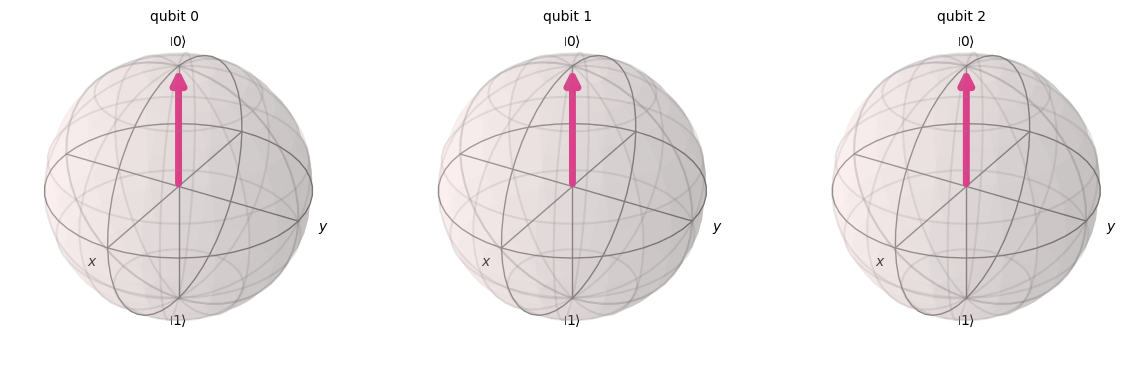

Fourier basis|000>


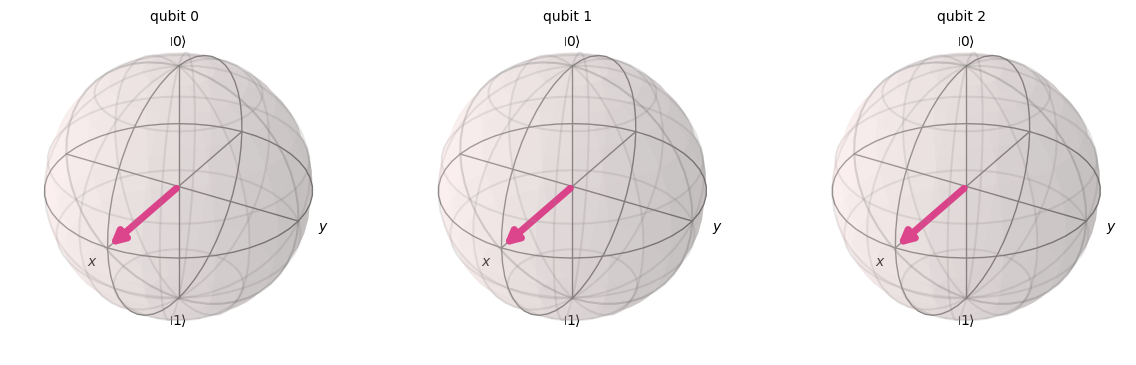

In [21]:
state = "000"

mycircuit = QuantumCircuit(len(state))
mycircuit.initialize(Statevector.from_label(state).data,mycircuit.qubits[::-1])

print(f"Computational basis|{state}>")
display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data))

print(f"Fourier basis|{state}>")
mycircuit.append(QFT(len(state),do_swaps = False),mycircuit.qubits)
display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data))

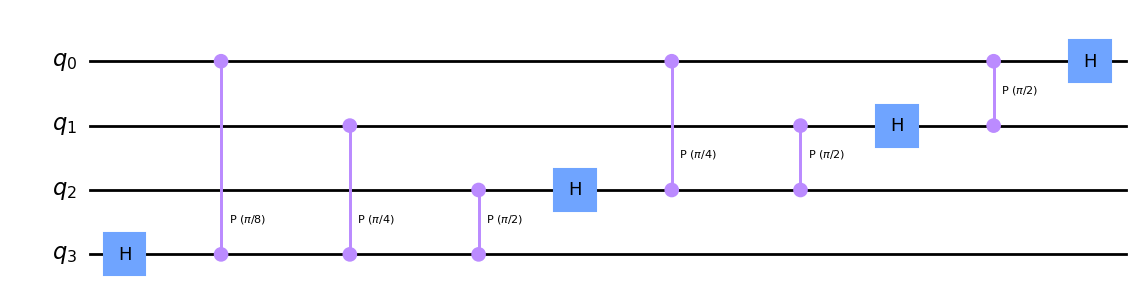

In [22]:
pi = np.pi
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

# Let's see how it looks:
qc = QuantumCircuit(4)
qft_rotations(qc,4)
#Figure 14
circuit_drawer(qc, output='mpl', filename="qft.png")

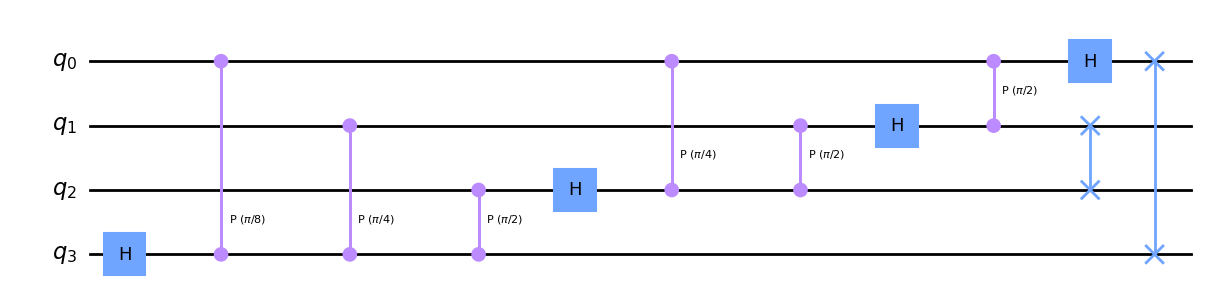

In [23]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Let's see how it looks:
qc = QuantumCircuit(4)
qft(qc,4)
circuit_drawer(qc, output='mpl')